# Лабораторная работа 4

# Задание I

In [111]:
import numpy as np
import sympy as sm

инициализируем функции

In [112]:
fun1=lambda x: np.exp(2*x)*np.cos(3*x)
fun2=lambda x: np.sin(np.log(x))
fun3=lambda x: np.log(x)
fun4=lambda x: np.cos(x)+np.sin(x)


### Полином Лагранжа

In [113]:
def Lagrange(X,func,x):
    ans=0
    Y=[func(x) for x in X]
    for i in range(len(X)):
        ram=1
        for j in range(len(X)):
            if (i!=j):
                ram*=(x-X[j])/(X[i]-X[j])
                
        ans+=Y[i]*ram
        
    return ans
            
        
    

### Полином Ньютона

In [114]:
def Newton(X,func,x):
    Y=np.array([func(x) for x in X])
    #X=np.array([-1,0,1,2])
    #Y=np.array([1,1,2,0])
    n=len(Y)
    coeff_matrix=np.zeros([n,n])
    coeff_matrix[::,0]=Y
    for j in range(1,n):
        for i in range(n-j):
            coeff_matrix[i][j]=(coeff_matrix[i+1][j-1]-coeff_matrix[i][j-1])/(X[i+j]-X[i])
    coeff_vector=coeff_matrix[0]
    result=0
    for i in range(n):
        kk=1
        for j in range(i):
            kk*=(x-(X[j]))
        result+=coeff_vector[i]*kk
    return result
    
   
        
    
    
    

### Метод наименьших квадратов

In [115]:
def least_square(X,fun,x):
    Y=[fun(x) for x in X]
    s1=s2=0
    for i in range(len(X)):
        s1+=X[i]*Y[i]
        s2+=X[i]**2
    a=(s1*len(X)-sum(X)*sum(Y))/(s2*len(X)-sum(X)**2)
    b=(np.sum(Y)-a*sum(X))/len(X)
    return a*x+b
        

### Пункт А

In [116]:
keys=[0.25,0.51,0.99,1.09,1.89,2.39]
X=[0,0.3,0.6]
for elem in keys:
    print(elem,Lagrange(X,fun1,elem),Newton(X,fun1,elem),least_square(X,fun1,elem),fun1(elem))


0.25 1.2507915593901018 1.2507915593901018 0.6056313566974476 1.2063510016467855
0.51 0.023819252859356876 0.02381925285935682 -0.1545815684069598 0.11310477962340527
0.99 -6.2267674159915165 -6.226767415991515 -1.5580515839843272 -7.136376555330972
1.09 -8.179743263413837 -8.179743263413835 -1.8504411705629458 -8.773475489233858
1.89 -31.88207779824823 -31.882077798248226 -4.189557863191891 35.83359599091905
2.39 -53.989152217306255 -53.989152217306255 -5.651505796084983 75.26013807164033


### Пункт Б

In [117]:
X=[2,2.4,2.6]
for elem in keys:
    print(elem,Lagrange(X,fun2,elem),Newton(X,fun2,elem),least_square(X,fun2,elem),fun2(elem))

0.25 -0.41641205275364257 -0.4164120527536359 0.116529666583495 -0.9830277404112437
0.51 -0.2090059608832462 -0.20900596088324352 0.19448079500478282 -0.623604042277235
0.99 0.127496252501766 0.1274962525017669 0.3383905705517757 -0.010050166658206879
1.09 0.1900240847707133 0.19002408477071442 0.36837177379073255 0.0860710680302494
1.89 0.5961899709548901 0.5961899709548899 0.6082213997023873 0.5944462368502892
2.39 0.7651312862383158 0.7651312862383157 0.7581274158971717 0.7651622942057001


### Пункт В

In [118]:
X=[1,1.1,1.3,1.4]
for elem in keys:
    print(elem,Lagrange(X,fun3,elem),Newton(X,fun3,elem),least_square(X,fun3,elem),fun3(elem))

0.25 -1.0970886486207583 -1.0970886486207583 -0.6244619597870635 -1.3862943611198906
0.51 -0.625563962937723 -0.6255639629377207 -0.4060623347316073 -0.6733445532637656
0.99 -0.010030245266729217 -0.010030245266729217 -0.0028630269369189776 -0.01005033585350145
1.09 0.08616989000796907 0.08616989000796905 0.08113682885364115 0.08617769624105241
1.89 0.6538267743446688 0.6538267743446692 0.7531356751781215 0.636576829071551
2.39 1.00557669607025 1.0055766960702543 1.1731349541309222 0.8712933659434193


### Пункт Г

In [119]:
X=[0,0.25,0.5,1]
for elem in keys:
    print(elem,Lagrange(X,fun4,elem),Newton(X,fun4,elem),least_square(X,fun4,elem),fun4(elem))

0.25 1.2163163809651676 1.2163163809651676 1.1714026164550149 1.2163163809651676
0.51 1.3609576005983683 1.3609576005983683 1.2648248826444646 1.3609217545286587
0.99 1.384918739199954 1.3849187391999542 1.4372967586865255 1.3847158391821082
1.09 1.3463559790626423 1.346355979062642 1.4732283995286215 1.349112281324788
1.89 0.41836490681612126 0.4183649068161258 1.7606815262653899 0.6356750555057482
2.39 -0.7930698234810905 -0.7930698234810782 1.9403397304758703 -0.047799105003197506


# Задание 2

In [120]:
def least_square(X,Y):
    s1=s2=0
    for i in range(len(X)):
        s1+=X[i]*Y[i]
        s2+=X[i]**2
    a=(s1*len(X)-sum(X)*sum(Y))/(s2*len(X)-sum(X)**2)
    b=(np.sum(Y)-a*sum(X))/len(X)
    return a,b

In [121]:
import pandas as pd
data=pd.read_csv('owid-covid-data.csv')
print(data)
cc=data.iloc[21386:21542]
Y=cc['new_cases']
Y=Y.values.tolist()
X=[i for i in range(len(Y))]



      iso_code       location        date  total_cases  new_cases  \
0          ABW          Aruba  2020-03-13            2          2   
1          ABW          Aruba  2020-03-20            4          2   
2          ABW          Aruba  2020-03-24           12          8   
3          ABW          Aruba  2020-03-25           17          5   
4          ABW          Aruba  2020-03-26           19          2   
...        ...            ...         ...          ...        ...   
21601      NaN  International  2020-02-28          705          0   
21602      NaN  International  2020-02-29          705          0   
21603      NaN  International  2020-03-01          705          0   
21604      NaN  International  2020-03-02          705          0   
21605      NaN  International  2020-03-10          696         -9   

       total_deaths  new_deaths  total_cases_per_million  \
0                 0           0                   18.733   
1                 0           0                   3

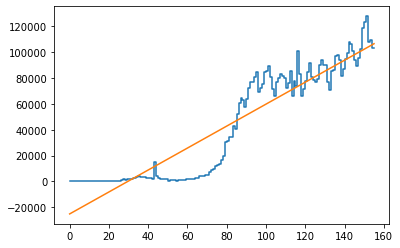

In [122]:
import matplotlib.pyplot as plt
k,b=least_square(X,Y)
Y_new=[k*x+b for x in X]
plt.step(X,Y)
plt.plot(X,Y_new)
plt.show()

# Кубический сплайн

In [123]:
def cubic_spline(x, y):
    x = np.array(x)
    y = np.array(y)
    n = len(x)
    delta_x = np.diff(x)
    delta_y = np.diff(y)
    A = np.zeros(shape = (n,n))
    b = np.zeros(shape=(n,1))
    A[0][0] = 1
    A[-1][-1] = 1
    for i in range(1,n-1):
        A[i][i-1] = delta_x[i-1]
        A[i][i+1] = delta_x[i]
        A[i][i] = 2*(delta_x[i-1]+delta_x[i])
        b[i][0] = 3*(delta_y[i]/delta_x[i] - delta_y[i-1]/delta_x[i-1])
    c = jacobi(A,b)
    c=np.array(c)
    d = np.zeros(shape = (n-1,1))
    b = np.zeros(shape = (n-1,1))
    for i in range(0,len(d)):
        d[i] = (c[i+1] - c[i]) / (3*delta_x[i])
        b[i] = (delta_y[i]/delta_x[i]) - (delta_x[i]/3)*(2*c[i] + c[i+1])    
    
    return b.squeeze(), c.squeeze(), d.squeeze()

In [124]:
def jacobi(A, b):
    n = A.shape[0]
    x = np.zeros(n)
    x_prev = x
    counter = 0
    error=999999
    
    while (error > 1e-5): 
        for i in range(0, n): 
            s = 0
            for j in range(0,n): 
                if i != j:
                    s += A[i][j] * x_prev[j] 
            x[i] = (b[i] - s) / A[i][i]
        error = (np.sum((x-x_prev)**2))**0.5 
        x_prev = x.copy() 
    return x

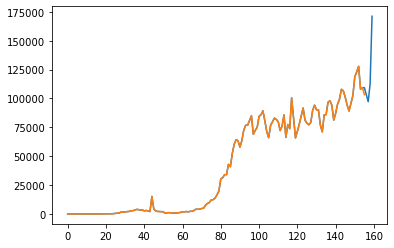

In [125]:
b,c,d=cubic_spline(X,Y)
new_y=[]
new_x=[i for i in range(160)]
for i in range(len(new_x)):
    pos=min(i,154)
    if (i>154):
        pos1=pos+1
    else:
        pos1=pos
    new_y.append(Y[pos]+b[pos]*(new_x[i]-X[pos1])+c[pos]*(new_x[i]-X[pos1])**2+d[pos]*(new_x[i]-X[pos1])**3)
plt.plot(new_x,new_y)
plt.plot(X,Y)
plt.show()
    



# Задание 3

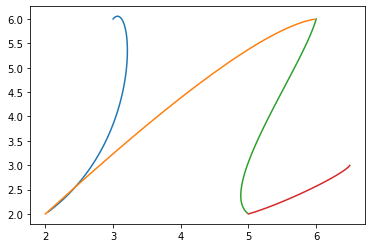

In [126]:
import matplotlib.pyplot as plt
import numpy as np
binom=lambda n,i:np.math.factorial(n)/np.math.factorial(i)/np.math.factorial(n-i)
B=lambda n,p,t:sum([binom(n,i)*((1-t)**(n-i))*(t**i)*p[i] for i in range(4)])
n=3
x=[3,3.3,3.5,2]
y=[6,6.5,3.5,2]
bx=[B(n,x,t) for t in np.arange(0,1,0.01)]
by=[B(n,y,t) for t in np.arange(0,1,0.01)]
plt.plot(bx, by)
x = [2,2.8,5,6] 
y = [2,3,5.8,6]
bx=[B(n,x,t) for t in np.arange(0,1,0.01)]
by=[B(n,y,t) for t in np.arange(0,1,0.01)]
plt.plot(bx, by)
x = [6,5.8,4.5,5] 
y = [6,5,2.5,2]
bx=[B(n,x,t) for t in np.arange(0,1,0.01)]
by=[B(n,y,t) for t in np.arange(0,1,0.01)]
plt.plot(bx,by)
x = [5,5.5,6.4,6.5] 
y = [2,2.2,2.8,3]
bx=[B(n,x,t) for t in np.arange(0,1,0.01)]
by=[B(n,y,t) for t in np.arange(0,1,0.01)]
plt.plot(bx, by)
plt.show()

### Буква 'В'

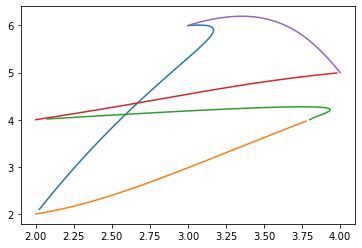

In [127]:
x=[3,3.5,2.8,2]
y=[6,6.1,5.3,2]
bx=[B(n,x,t) for t in np.arange(0,1.,0.01)]
by=[B(n,y,t) for t in np.arange(0,1.,0.01)]
plt.plot(bx, by)
x = [2,2.5,3,3.8] 
y = [2,2.25,3,4]
bx=[B(n,x,t) for t in np.arange(0,1,0.01)]
by=[B(n,y,t) for t in np.arange(0,1,0.01)]
plt.plot(bx, by)
x = [3.8,3.9,4.5,2] 
y = [4,4.2,4.5,4]
bx=[B(n,x,t) for t in np.arange(0,1,0.01)]
by=[B(n,y,t) for t in np.arange(0,1,0.01)]
plt.plot(bx,by)
x = [2,3,3.25,4] 
y = [4,4.5,4.75,5]
bx=[B(n,x,t) for t in np.arange(0,1,0.01)]
by=[B(n,y,t) for t in np.arange(0,1,0.01)]
plt.plot(bx, by)
x = [4,3.75,3.5,3] 
y = [5,6,6.5,6]
bx=[B(n,x,t) for t in np.arange(0,1,0.01)]
by=[B(n,y,t) for t in np.arange(0,1,0.01)]
plt.plot(bx, by)
plt.show()